# 어제 복습

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

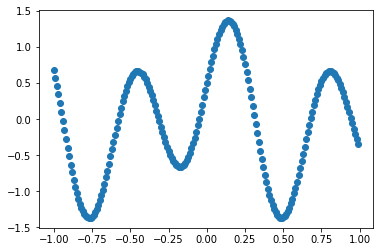

In [ ]:
x = np.arange(-1, 1, 0.01)
np.random.shuffle(x)
y = np.sin(10*x) + 0.5 * np.cos(5*x)

plt.scatter(x,y)
plt.show()

In [ ]:
index = int(len(x)*0.8)

train_x, test_x = x[:index], x[index:]
train_y, test_y = y[:index], y[index:]

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
model = keras.Sequential()
model.add(Input(1))
model.add(Dense(10, activation="tanh"))
model.add(Dense(10, activation="tanh"))
model.add(Dense(1))

model.compile(loss="mse", optimizer="Adam", metrics=["mae"])

In [ ]:
hist = model.fit(train_x, train_y, epochs=1000, validation_split=0.1, batch_size=128, verbose=0)

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

In [ ]:
plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.show()

In [ ]:
y_ = model.predict(test_x)
plt.scatter(test_x, test_y)
plt.scatter(test_x, y_)
plt.show()

# 붓꽃 데이터 분류

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv


--2021-12-22 01:31:27--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2720 (2.7K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   2.66K  --.-KB/s    in 0s      

2021-12-22 01:31:27 (50.1 MB/s) - ‘iris.csv’ saved [2720/2720]



In [ ]:
!ls -al
!head iris.csv
# ! 이 표시는 리눅스에서 사용하는 기능을 사용하기 위한 

total 20
drwxr-xr-x 1 root root 4096 Dec 22 01:31 .
drwxr-xr-x 1 root root 4096 Dec 22 01:25 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 2720 Dec 22 01:31 iris.csv
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
6.4,2.8,5.6,2.2,0,0,1
5.0,2.3,3.3,1.0,0,1,0
4.9,2.5,4.5,1.7,0,0,1
4.9,3.1,1.5,0.1,1,0,0
5.7,3.8,1.7,0.3,1,0,0
4.4,3.2,1.3,0.2,1,0,0
5.4,3.4,1.5,0.4,1,0,0
6.9,3.1,5.1,2.3,0,0,1
6.7,3.1,4.4,1.4,0,1,0


In [ ]:
iris = pd.read_csv("iris.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,0,0,1
1,5.0,2.3,3.3,1.0,0,1,0
2,4.9,2.5,4.5,1.7,0,0,1
3,4.9,3.1,1.5,0.1,1,0,0
4,5.7,3.8,1.7,0.3,1,0,0


In [ ]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   septal_length  120 non-null    float64
 1   septal_width   120 non-null    float64
 2   petal_length   120 non-null    float64
 3   petal_width    120 non-null    float64
 4   setosa         120 non-null    int64  
 5   versicolor     120 non-null    int64  
 6   virginica      120 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 6.7 KB


In [ ]:
data = iris.to_numpy() #넘파이 배열로 바꾸기
print(data.shape) #7가지의 값을 가지는 120개 데이터
print(data[:5])

(120, 7)
[[6.4 2.8 5.6 2.2 0.  0.  1. ]
 [5.  2.3 3.3 1.  0.  1.  0. ]
 [4.9 2.5 4.5 1.7 0.  0.  1. ]
 [4.9 3.1 1.5 0.1 1.  0.  0. ]
 [5.7 3.8 1.7 0.3 1.  0.  0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

In [ ]:
model = keras.Sequential()
model.add(Input(4)) # 독립변수 4개
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 종속변수(종의 개수) 3개
# 'softmax' : ??

In [ ]:
# softmax 함수는 로지스틱 회귀에서 변수가 3개 이상일 경우를 위한 함수
# 즉 n개의 분류 중 각각의 확률 중 가장 높은 확률을 가진 분류를 채택
# 원-핫 벡터로 수치화를 하여 분류의 정답을 도출
# 1-(가장 확률이 높은 분휴) -> 오차의 개념

In [ ]:
# 더 나아가 오차로 부터 가중치와 편향을 업데이트 한다.
# 

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# loss='categorical_crossentropy' : categorical->분류 

In [ ]:
for i in range(1000):
  
  y_predict=...
  count=...
  correct =...
  acc = correct/ count

텐서플러우에서는 이렇게 힘들게 해야하는데
케라스는 loss='categorical_crossentropy' 간단하게 해준다

In [ ]:
model.fit(train_x, train_y, epochs=200, verbose=0)


In [ ]:
loss, acc = model.evaluate(test_x, test_y)

print("loss :", loss)
print("acc :", acc)

1/1 [==============================] - 0s 182ms/step - loss: 0.0988 - accuracy: 1.0000
loss : 0.09879903495311737
acc : 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))
# np.argmax() : 최대값 배열 위치를 알려주는 함수

[[0.96531594 0.03251324 0.00217091]
 [0.07789979 0.8708461  0.0512541 ]
 [0.9591722  0.03815786 0.00267005]
 [0.03363242 0.8952716  0.07109605]
 [0.9619597  0.03586155 0.00217873]
 [0.96797335 0.03002704 0.00199966]
 [0.96761024 0.03041904 0.0019707 ]
 [0.96755826 0.03046202 0.00197968]
 [0.1165614  0.832377   0.05106156]
 [0.9593402  0.03830615 0.00235371]
 [0.0101776  0.28478456 0.70503783]
 [0.04078711 0.8360755  0.12313743]
 [0.96048456 0.03716614 0.00234927]
 [0.00220787 0.06213378 0.9356583 ]
 [0.9600361  0.0377672  0.00219682]
 [0.01835507 0.75550234 0.22614251]
 [0.0358115  0.881695   0.08249358]
 [0.9606577  0.03699302 0.00234927]
 [0.9647777  0.03303399 0.00218833]
 [0.04989373 0.8785903  0.07151596]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


# loss categorical_crossentropy
2가지 crossentropy 사용 방법

-categorical_crossentropy \
(위의 softmax가 Last-layer activation, one-hot vector을 이용한 label 필요) \
-sparse_categorical_crossentropy

https://cheris8.github.io/artificial%20intelligence/DL-Keras-Loss-Function/ 

In [ ]:
# 붓꽃데이터가 분류 분석이므로
# loss function 을 분류에 맞는 손실함류를 사용
loss :
categorical_crossentropy (label : one-hot)
sparse_categorical_crossentropy (label : int형태)
# binary crossentropy : 2진 부류니까 이것도 예외인 것 알지?

# iris_dnn with category index
아래의 코드는 dnn_iris_and_optimizer.ipynb의 코드를 기반으로 한다.



In [ ]:
!wget https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv


--2021-12-22 02:13:27--  https://raw.githubusercontent.com/dhrim/MDC_2021/master/material/deep_learning/iris_with_category_index.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2218 (2.2K) [text/plain]
Saving to: ‘iris_with_category_index.csv’

iris_with_category_ 100%[===================>]   2.17K  --.-KB/s    in 0s      

2021-12-22 02:13:27 (33.8 MB/s) - ‘iris_with_category_index.csv’ saved [2218/2218]



In [ ]:
!ls -al
!head iris_with_category_index.csv

total 24
drwxr-xr-x 1 root root 4096 Dec 22 02:13 .
drwxr-xr-x 1 root root 4096 Dec 22 01:25 ..
drwxr-xr-x 4 root root 4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root 2720 Dec 22 01:31 iris.csv
-rw-r--r-- 1 root root 2218 Dec 22 02:13 iris_with_category_index.csv
drwxr-xr-x 1 root root 4096 Dec  3 14:33 sample_data
septal_length,septal_width,petal_length,petal_width,class
6.4,2.8,5.6,2.2,2
5.0,2.3,3.3,1.0,1
4.9,2.5,4.5,1.7,2
4.9,3.1,1.5,0.1,0
5.7,3.8,1.7,0.3,0
4.4,3.2,1.3,0.2,0
5.4,3.4,1.5,0.4,0
6.9,3.1,5.1,2.3,2
6.7,3.1,4.4,1.4,1


In [ ]:
iris = pd.read_csv("iris_with_category_index.csv")
iris.head()

,septal_length,septal_width,petal_length,petal_width,class
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
data = iris.to_numpy()
print(data.shape)
print(data[:5])

(120, 5)
[[6.4 2.8 5.6 2.2 2. ]
 [5.  2.3 3.3 1.  1. ]
 [4.9 2.5 4.5 1.7 2. ]
 [4.9 3.1 1.5 0.1 0. ]
 [5.7 3.8 1.7 0.3 0. ]]


In [ ]:
x = data[:,:4]
y = data[:,4:]

split_index = 100

train_x, test_x = x[:split_index], x[split_index:]
train_y, test_y = y[:split_index], y[split_index:]

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100, 1)
(20, 4)
(20, 1)


In [ ]:
model = keras.Sequential()
model.add(Input(4))
model.add(Dense(10, activation='tanh'))
model.add(Dense(10, activation='tanh'))
model.add(Dense(3, activation='softmax')) # 1이 아니고 클래스 수 3이다

# model.compile(optimizer="SGD", loss="categorical_crossentropy", metrics=["accuracy"])
model.compile(optimizer="SGD", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()

model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=20)

loss, acc = model.evaluate(test_x, test_y)
print("loss=", loss)
print("acc=", acc)

# 분류 : (sparse_)categorical_crossentropy
# 회귀 : mse
# 거의 이렇게만 사용한다고 하신다.            
# 워낙에 kerase가 인코딩을 잘해준다고 하신다.

# loss : 손실함수, 훈련셋과 연관
# metric : 평가지표, 검증셋과 연관

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 10)                50        
                                                                 
 dense_10 (Dense)            (None, 10)                110       
                                                                 
 dense_11 (Dense)            (None, 3)                 33        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________
1/1 [==============================] - 0s 94ms/step - loss: 0.0305 - accuracy: 1.0000
loss= 0.03049142099916935
acc= 1.0


In [ ]:
y_ = model.predict(test_x)
print(y_)
print(np.argmax(y_, axis=1))

[[9.9203253e-01 7.6755434e-03 2.9194963e-04]
 [9.8377643e-03 9.8746443e-01 2.6978336e-03]
 [9.7398776e-01 2.5538955e-02 4.7321111e-04]
 [4.7993977e-03 9.9236792e-01 2.8327317e-03]
 [9.9288613e-01 6.8328590e-03 2.8102181e-04]
 [9.9419457e-01 5.5444362e-03 2.6099407e-04]
 [9.9485481e-01 4.8942696e-03 2.5089458e-04]
 [9.9492419e-01 4.8238332e-03 2.5186958e-04]
 [1.4228750e-02 9.8351181e-01 2.2595306e-03]
 [9.9173111e-01 7.9717245e-03 2.9723640e-04]
 [8.7539240e-04 2.5810978e-01 7.4101484e-01]
 [3.7903416e-03 9.8993170e-01 6.2779309e-03]
 [9.9008280e-01 9.6023995e-03 3.1479678e-04]
 [3.6973279e-04 8.2272589e-02 9.1735762e-01]
 [9.9265105e-01 7.0634736e-03 2.8557758e-04]
 [2.4543134e-03 9.4067127e-01 5.6874409e-02]
 [4.9037738e-03 9.9120235e-01 3.8938539e-03]
 [9.9187404e-01 7.8258216e-03 3.0012132e-04]
 [9.9273139e-01 6.9851931e-03 2.8348327e-04]
 [5.3254352e-03 9.9188179e-01 2.7927393e-03]]
[0 1 0 1 0 0 0 0 1 0 2 1 0 2 0 1 1 0 0 1]


https://bskyvision.com/741
피어슨 상관계수를 모겡릐 손실함수 또는 평가지표로 사용하려며